In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def extract_data_from_logs(model_log):
    PATH_TO_MODEL_LOGS = model_log
    with open(PATH_TO_MODEL_LOGS, 'r') as file: #change path to training logs here
        log = file.read()

    arr = log.split()
    train_loss, test_loss, f1_score_train, f1_score_test = [], [], [], []

    is_training = 0

    for i in range(0,len(arr)):
        if (arr[i] == 'Training'): train_loss.append(float(arr[i + 3][:-1]))
        if (arr[i] == 'Testing'): test_loss.append(float(arr[i + 3][:-1]))
        if (arr[i] == 'F1_score'):
            if (is_training == 0): f1_score_train.append(float(arr[i + 2][:-1]))
            else: f1_score_test.append(float(arr[i + 2][:-1]))
            is_training = 1 - is_training

    return train_loss, test_loss, f1_score_train, f1_score_test

train_gru, test_gru, f1_train_gru, f1_test_gru = extract_data_from_logs('/home/k64t/person-reid/demo_log/MiscStuff/btl_datamining/code/result/GRU_0.75f1_nonbi.txt')
train_rnn, test_rnn, f1_train_rnn, f1_test_rnn = extract_data_from_logs('/home/k64t/person-reid/demo_log/MiscStuff/btl_datamining/code/result/RNN.txt')
train_lstm, test_lstm, f1_train_lstm, f1_test_lstm = extract_data_from_logs('/home/k64t/person-reid/demo_log/MiscStuff/btl_datamining/code/result/LSTM.txt')

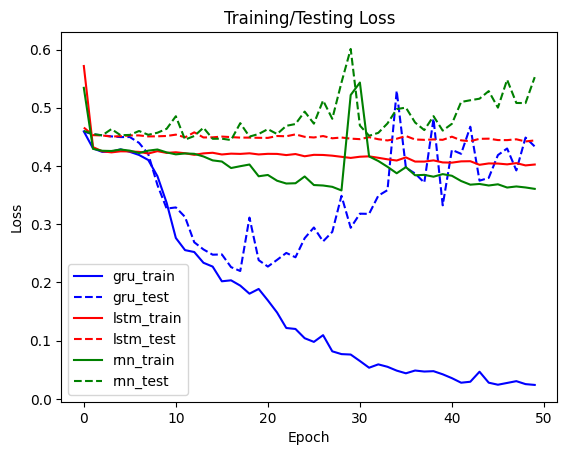

In [47]:
x = range(len(train_gru))
plt.plot(x, train_gru, label='gru_train', linestyle='-',color = 'blue')
plt.plot(x, test_gru, label='gru_test', linestyle='--',color = 'blue')

plt.plot(x, train_lstm, label='lstm_train', linestyle='-',color = 'red')
plt.plot(x, test_lstm, label='lstm_test', linestyle='--',color = 'red')

plt.plot(x, train_rnn, label='rnn_train', linestyle='-',color = 'green')
plt.plot(x, test_rnn, label='rnn_test', linestyle='--',color = 'green')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Testing Loss')

plt.legend()
plt.show()

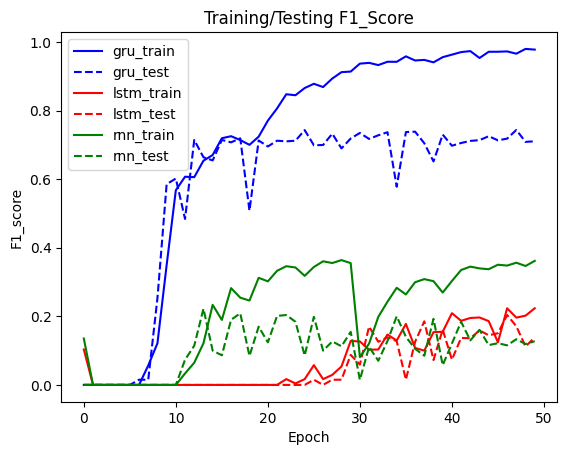

In [48]:
x = range(len(train_gru))
plt.plot(x, f1_train_gru, label='gru_train', linestyle='-',color = 'blue')
plt.plot(x, f1_test_gru, label='gru_test', linestyle='--',color = 'blue')

plt.plot(x, f1_train_lstm, label='lstm_train', linestyle='-',color = 'red')
plt.plot(x, f1_test_lstm, label='lstm_test', linestyle='--',color = 'red')

plt.plot(x, f1_train_rnn, label='rnn_train', linestyle='-',color = 'green')
plt.plot(x, f1_test_rnn, label='rnn_test', linestyle='--',color = 'green')


plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.title('Training/Testing F1_Score')

plt.legend()
plt.show()

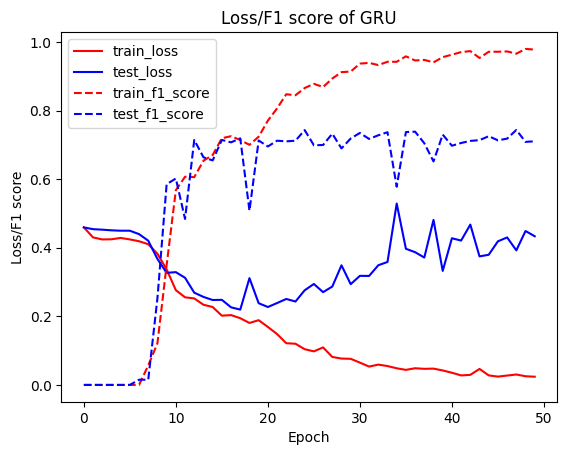

In [51]:
def plot_performance_model(model, train_loss, test_loss, f1_score_train, f1_score_test):
    plt.title('Loss/F1 score of ' + model)
    plt.ylabel('Loss/F1 score')
    plt.xlabel('Epoch')

    sns.lineplot(x=range(len(train_loss)), y=train_loss, color = 'r', label = 'train_loss')
    sns.lineplot(x=range(len(test_loss)), y=test_loss, color = 'b', label = 'test_loss')
    plt.plot(range(len(f1_score_train)), f1_score_train, linestyle = '--', color = 'r', label = 'train_f1_score')
    plt.plot(range(len(f1_score_test)), f1_score_test, linestyle = '--', color = 'b', label = 'test_f1_score')
    
    plt.legend()
    plt.show()

plot_performance_model('GRU',train_gru, test_gru, f1_train_gru, f1_test_gru)

[1.0, 0.391891891891891, 1.0]
[1.0, 0.3918918918918919, 0.3918918918918919]


Text(0.5, 1.0, 'Hyperparams tuning')

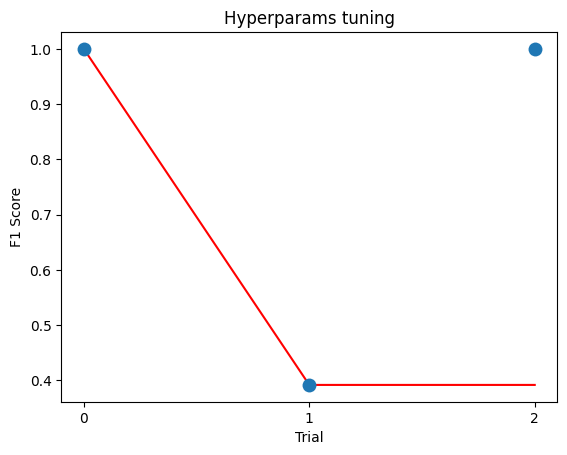

In [25]:
PATH_TO_OPTUNAL_LOGS = '/home/k64t/person-reid/demo_log/MiscStuff/btl_datamining/code/result/optuna_GRUlog.txt'
with open(PATH_TO_OPTUNAL_LOGS, 'r') as file: #change path to training logs here
    log = file.read()

arr = log.split()
best_value, all_value = [], []

is_training = 1

for i in range(0,len(arr)):
    if (arr[i] == 'value:'):
        if (is_training == 1): all_value.append(float(arr[i + 1][:-1]))
        else: best_value.append(float(arr[i + 1][:-1]))
        is_training = 1 - is_training

print(all_value)
print(best_value)

# Create a dot plot using Seaborn's stripplot
sns.stripplot(x = range(len(all_value)), y = all_value, jitter=False, size=10)
sns.lineplot(x = range(len(all_value)), y = best_value, color = 'red')


# Set labels and title
plt.xlabel('Trial')
plt.ylabel('F1 Score')
plt.title('Hyperparams tuning')
